# Launch Videos
Ther two designs below were used in the October video used to launch qiskit-metal on twitter.

## First launch video

### Preparations

In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

In [2]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
TransmonPocket.get_template_options(design)

{'pos_x': '0um',
 'pos_y': '0um',
 'connection_pads': {},
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'},
 'chip': 'main',
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'orientation': '0',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

Set the default settings for trace width and trace gap.

In [3]:
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

### Create the design
4 transmons (3 pins each) + 4 CPWs

In [4]:
# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

## Custom options for all the transmons
options = dict(
    # Some options we want to modify from the defaults
    # (see below for defaults)
    pad_width = '425 um', 
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict(
        a = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

## Create 4 transmons

q1 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.42251mm', pos_y='+0.0mm', **options))
q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x='+0.0mm', pos_y='-0.95mm', orientation = '270', **options))
q3 = TransmonPocket(design, 'Q3', options = dict(
    pos_x='-2.42251mm', pos_y='+0.0mm', orientation = '180', **options))
q4 = TransmonPocket(design, 'Q4', options = dict(
    pos_x='+0.0mm', pos_y='+0.95mm', orientation = '90', **options))

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
RouteMeander.get_template_options(design)

options = Dict(
        lead=Dict(
            start_straight='0.2mm',
            end_straight='0.2mm'),
        trace_gap='9um',
        trace_width='15um')

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str, asymmetry='0 um', flip=False, fillet='90um'):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        fillet=fillet,
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        total_length=length)
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym = 140
cpw1 = connect('cpw1', 'Q1', 'c', 'Q2', 'b', '5.6 mm', f'+{asym}um')
cpw2 = connect('cpw2', 'Q3', 'b', 'Q2', 'c', '5.7 mm', f'-{asym}um', flip=True)
cpw3 = connect('cpw3', 'Q3', 'c', 'Q4', 'b', '5.6 mm', f'+{asym}um')
cpw4 = connect('cpw4', 'Q1', 'b', 'Q4', 'c', '5.7 mm', f'-{asym}um', flip=True)

gui.rebuild()
gui.autoscale()

4 Open to Ground Pins

In [5]:
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround

otg1 = OpenToGround(design, 'OTG1', options = dict(pos_x='2771um', pos_y='0', orientation='180', gap='9um', width='15um'))
otg2 = OpenToGround(design, 'OTG2', options = dict(pos_x='0um', pos_y='-1301um', orientation='90', gap='9um', width='15um'))
otg3 = OpenToGround(design, 'OTG3', options = dict(pos_x='-2771um', pos_y='0', orientation='0', gap='9um', width='15um'))
otg4 = OpenToGround(design, 'OTG4', options = dict(pos_x='0um', pos_y='1301um', orientation='270', gap='9um', width='15um'))

V1 Launchers

In [6]:
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

p1_c = LaunchpadWirebond(design, 'P1_C', options = dict(pos_x='4000um', pos_y='2812um', orientation='270', lead_length='0um', cpw_gap='9um', cpw_width='15um'))
p2_c = LaunchpadWirebond(design, 'P2_C', options = dict(pos_x='4000um', pos_y='-2812um', orientation='90', lead_length='0um', cpw_gap='9um', cpw_width='15um'))
p3_c = LaunchpadWirebond(design, 'P3_C', options = dict(pos_x='-4000um', pos_y='-2812um', orientation='90', lead_length='0um', cpw_gap='9um', cpw_width='15um'))
p4_c = LaunchpadWirebond(design, 'P4_C', options = dict(pos_x='-4000um', pos_y='2812um', orientation='270', lead_length='0um', cpw_gap='9um', cpw_width='15um'))

V2 Launchers

In [7]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

p1_q = LaunchpadWirebondCoupled(design, 'P1_Q', options = dict(pos_x='4020um', pos_y='0', orientation='180', lead_length='0um', cpw_gap='9um', cpw_width='15um'))
p2_q = LaunchpadWirebondCoupled(design, 'P2_Q', options = dict(pos_x='-990um', pos_y='-2812um', orientation='90', lead_length='0um', cpw_gap='9um', cpw_width='15um'))
p3_q = LaunchpadWirebondCoupled(design, 'P3_Q', options = dict(pos_x='-4020um', pos_y='0', orientation='0', lead_length='0um', cpw_gap='9um', cpw_width='15um'))
p4_q = LaunchpadWirebondCoupled(design, 'P4_Q', options = dict(pos_x='990um', pos_y='2812um', orientation='270', lead_length='0um', cpw_gap='9um', cpw_width='15um'))

gui.rebuild()
gui.autoscale()

Charge Lines to Corners

In [8]:
import numpy as np
from collections import OrderedDict

from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

anchors1c = OrderedDict()
anchors1c[0] = np.array([3, 0])
anchors1c[1] = np.array([3, 2.5]) 
anchors1c[2] = np.array([4, 2.5])

options_line_cl1 = {'pin_inputs': 
            {'start_pin': {'component': 'OTG1', 'pin': 'open'}, 
             'end_pin': {'component': 'P1_C', 'pin': 'tie'}},
            'leadin': {'start': '0um', 'end': '0um'},
            'anchors': anchors1c,
            'trace_gap': '9um',
            'trace_width': '15um',
            'fillet': '90um'        
            }

cl1 = RouteAnchors(design, 'line_cl1', options_line_cl1)

anchors2c = OrderedDict()
anchors2c[0] = np.array([0, -1.5])
anchors2c[1] = np.array([2, -1.5]) 
anchors2c[2] = np.array([2, -2.5])
anchors2c[3] = np.array([4, -2.5])

options_line_cl2 = {'pin_inputs': 
            {'start_pin': {'component': 'OTG2', 'pin': 'open'}, 
             'end_pin': {'component': 'P2_C', 'pin': 'tie'}},
            'leadin': {'start': '0um', 'end': '0um'},
            'anchors': anchors2c,
            'fillet': '90um',
            'trace_gap': '9um',
            'trace_width': '15um'
            }

cl2 = RouteAnchors(design, 'line_cl2', options_line_cl2)

anchors3c = OrderedDict()
anchors3c[0] = np.array([-3, 0])
anchors3c[1] = np.array([-3, -2.5]) 
anchors3c[2] = np.array([-4, -2.5])

options_line_cl3 = {'pin_inputs': 
            {'start_pin': {'component': 'OTG3', 'pin': 'open'}, 
             'end_pin': {'component': 'P3_C', 'pin': 'tie'}},
            'leadin': {'start': '0um', 'end': '0um'},
            'anchors': anchors3c,
            'fillet': '90um',
            'trace_gap': '9um',
            'trace_width': '15um'
            }

cl3 = RouteAnchors(design, 'line_cl3', options_line_cl3)

anchors4c = OrderedDict()
anchors4c[0] = np.array([0, 1.5])
anchors4c[1] = np.array([-2, 1.5]) 
anchors4c[2] = np.array([-2, 2.5])
anchors4c[3] = np.array([-4, 2.5])

options_line_cl4 = {'pin_inputs': 
            {'start_pin': {'component': 'OTG4', 'pin': 'open'}, 
             'end_pin': {'component': 'P4_C', 'pin': 'tie'}},
            'leadin': {'start': '0um', 'end': '0um'},
            'anchors': anchors4c,
            'fillet': '90um',
            'trace_gap': '9um',
            'trace_width': '15um'
            }

cl4 = RouteAnchors(design, 'line_cl4', options_line_cl4)

gui.rebuild()
gui.autoscale()

Exchange Coupler Lines

In [9]:
options = Dict(
        lead=Dict(
            start_straight='0.35mm',
            end_straight='0.15mm'),
        trace_gap='9um',
        trace_width='15um')

ol1 = connect('ol1', 'Q1', 'a', 'P1_Q', 'tie', '5.5 mm', f'+{asym}um', flip=True)
ol2 = connect('ol2', 'Q2', 'a', 'P2_Q', 'tie', '13.0 mm', f'+{asym}um', flip=True)
ol3 = connect('ol3', 'Q3', 'a', 'P3_Q', 'tie', '5.5 mm', f'+{asym}um', flip=True)
ol4 = connect('ol4', 'Q4', 'a', 'P4_Q', 'tie', '13.0 mm', f'+{asym}um', flip=True)

gui.rebuild()
gui.autoscale()

### Export
We now demonstrate the export to GDS. QDesign enables GDS renderer during init.

In [10]:
a_gds = design.renderers.gds
a_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '100um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '200um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

If you have a fillet_value, this will not be applied to the LineSegments that are shorter than 2*fillet_value. 

In [11]:
a_gds.options['short_segments_to_not_fillet'] = 'True'
a_gds.options['check_short_segments_by_scaling_fillet'] = 2.0
a_gds.options['path_filename'] = '../resources/Fake_Junctions.GDS'

Export GDS file for all components in design.
Please include the path to the location where you want to eport the GDS file. No path, will export to the folder where this notebook resides.

`export_to_gds(self, file_name: str, highlight_qcomponents: list = []) -> int`

In [12]:
a_gds.export_to_gds("Launch_Notebook.gds")

02:54PM 53s WARNING [_cheese_buffer_maker]: The bounding box for no-cheese is outside of chip size.
Bounding box for chip is (-4.5, -3.0, 4.5, 3.0).
Bounding box with no_cheese buffer is (-4.295000000000001, -3.087, 4.295000000000001, 3.087).


1

In [13]:
gui.main_window.close()

True

#### END of first video

## Second launch video
Requires both Ansys and the design from the previous setup

### Preparations

In [14]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

QAnsysRenderer.default_options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [16]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

In [17]:
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

### Create the design

In [18]:
# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

## Custom options for all the transmons
options = dict(
    # Some options we want to modify from the defaults
    # (see below for defaults)
    pad_width = '425 um', 
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict(
        a = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

## Create 4 transmons

q1 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.42251mm', pos_y='+0.0mm', **options))
q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x='+0.0mm', pos_y='-0.95mm', orientation = '270', **options))
q3 = TransmonPocket(design, 'Q3', options = dict(
    pos_x='-2.42251mm', pos_y='+0.0mm', orientation = '180', **options))
q4 = TransmonPocket(design, 'Q4', options = dict(
    pos_x='+0.0mm', pos_y='+0.95mm', orientation = '90', **options))

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
RouteMeander.get_template_options(design)

options = Dict(
        lead=Dict(
            start_straight='0.2mm',
            end_straight='0.2mm'),
        trace_gap='9um',
        trace_width='15um')

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str, asymmetry='0 um', flip=False, fillet='90um'):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        fillet=fillet,
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        total_length=length)
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym = 140
cpw1 = connect('cpw1', 'Q1', 'c', 'Q2', 'b', '5.6 mm', f'+{asym}um')
cpw2 = connect('cpw2', 'Q3', 'b', 'Q2', 'c', '5.7 mm', f'-{asym}um', flip=True)
cpw3 = connect('cpw3', 'Q3', 'c', 'Q4', 'b', '5.6 mm', f'+{asym}um')
cpw4 = connect('cpw4', 'Q1', 'b', 'Q4', 'c', '5.7 mm', f'-{asym}um', flip=True)

gui.rebuild()
gui.autoscale()

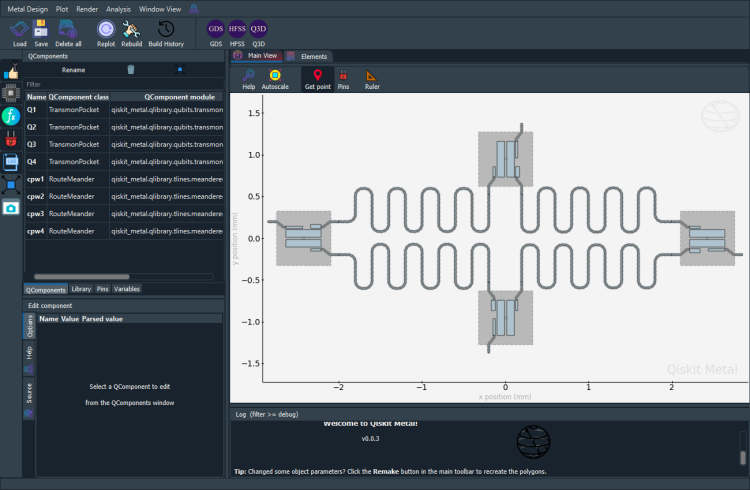

In [19]:
gui.screenshot()

### Render the design
This section directly interacts with the renderer, thus will not allow analysis. For analyzing the design, please refer to the method described in the `tutorial notebook 4.2`.

In [20]:
fourq = design.renderers.hfss

Before proceding, open Ansys Electronic Desktop manually and wait for it to completely open. Also create a project if it does not get created automatically.

The following cell will error out if Ansys is not configured correctly.

In [21]:
fourq.connect_ansys()

INFO 02:54PM [connect_project]: Connecting to Ansys Desktop API...
INFO 02:54PM [load_ansys_project]: 	Opened Ansys App
INFO 02:54PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 02:54PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Ansoft/
	Project:   Project16
INFO 02:54PM [connect_design]: No active design found (or error getting active design).
INFO 02:54PM [connect]: 	 Connected to project "Project16". No design detected


In [22]:
fourq.add_eigenmode_design("FourQ")

02:54PM 59s WARNING [add_eigenmode_design]: This method is deprecated. Change your scripts to use new_ansys_design()
INFO 02:55PM [connect_design]: 	Opened active design
	Design:    FourQ [Solution type: Eigenmode]
WARNING 02:55PM [connect_setup]: 	No design setup detected.
WARNING 02:55PM [connect_setup]: 	Creating eigenmode default setup.
INFO 02:55PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


Render everything from the design onto Ansys.

In [ ]:
fourq.render_design([], [])

In [ ]:
fourq.disconnect_ansys()